## Image Segmentation

In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np 

Load image and flatten it for the kmeans function

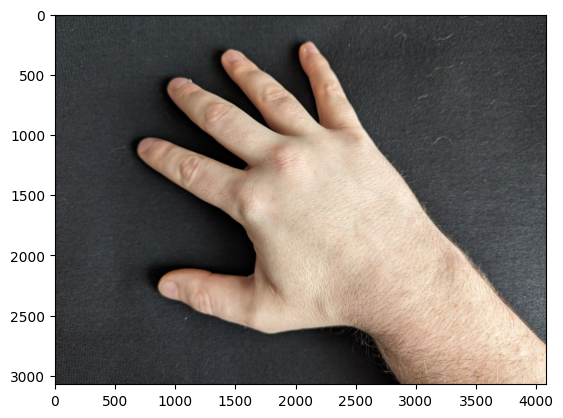

In [2]:
image = imread('HandR_BlackBG.jpg')
flattenedImage = np.reshape(image, [-1, 3])
plt.imshow(image)

### initClusters(np.array, int)

Function given an image and number of clusters will randomly choose x and y coordinates and store the RGB values at that coordinate.  The RGB values stored will be the initial clusters of the KMeans function used later.

image(h x w x 3) - image of height x width x RGB

numClusters(int) - the number of clusters required

In [4]:
import random
random.seed()

def initClusters(image: np.array, numClusters):
    init = np.empty([numClusters, 3])
    
    height = image.shape[0]
    width = image.shape[1]
    
    for i in range(numClusters):
        y = random.randrange(0, height)
        x = random.randrange(0, width)
        
        red = image[y, x, 0]
        green = image[y, x, 1]
        blue = image[y, x, 2]
        
        cluster = np.array([red, green, blue])
        init[i] = cluster
    
    return init
    
    

### buildM(np.array, int, int)
Function used to apply kmeans to an image given.

numExec(int) - is the number of executions of KMeans desired to be done on the image

numClusters(int) - is the number of clusters to be used for the KMeans clustering

In [5]:
from sklearn.cluster import KMeans

def buildM(image, numExecs: int, numClusters: int):
    height = image.shape[0]
    width = image.shape[1]
    
    # create a blank M matrix with the height and width of the image
    # and the number of executions for KMeans that we are using
    M = np.zeros([height, width, numExecs])
    
    # image needs to be flattend to 2-dimensional to use sklearn KMeans function
    flattendedImage = np.reshape(image, [-1, 3])
    
    # Loop for all desired amount of executions of KMeans
    for i in range(0, numExecs):
        # the random initial values for KMeans function
        # these are random pixels selected by the positioning
        # the colors of the random pixel are stored and sorted from
        # heighest red value to lowest red value
        init = np.sort(initClusters(image, numClusters), axis=0)
        
        # run a KMeans clustering with the desired amount of clusters on
        # the flattened image
        kmeans = KMeans(n_clusters=numClusters, init=init).fit(flattendedImage)
        
        # predict each pixel in the flattened image and reshape to original image size
        flattenedPrediction = kmeans.predict(flattendedImage)
        imageShapedPrediction = np.reshape(flattenedPrediction, [height, width, 1])
        
        # add prediction to M
        M[:, :, i:i+1] = imageShapedPrediction
        print(f"Completed {i + 1} execution{'' if i < 1 else 's'}", end="\r")
        
    print(f"Completed M build with {numExecs} executions.")
    return M

### clusterTest(np.array, int)
This function builds a segmented image by randomly choosing colors to apply to the cluster predictions made by the KMeans function.

M(np.array[h x w x numExecutions]) - a 3-Dimensional array of KMeans predictions

numClusters(int) - the number of clusters in the prediction

In [6]:
def clusterTest(M, numClusters, numImages):
    print("Coloring the segmented clusters...")
    segmentedImage = np.zeros([M.shape[0], M.shape[1], 3, numImages], dtype=np.int8)
    
    # create a random color code for every cluster in M
    clusterColors = np.zeros([numClusters, 3])
    for i in range(0, numClusters):
        r = int(random.randrange(0, 255))
        g = int(random.randrange(0, 255))
        b = int(random.randrange(0, 255))
        clusterColors[i] = [r, g, b]
    
    # for each segmented image
    for iii in range(0, numImages):
        # for each pixel in the Y direction
        for i in range(0, M.shape[0]):
            # for each pixel in the X direction
            for ii in range(0, M.shape[1]):
                # assign a color based on the cluster the pixel is apart of
                segmentedImage[i, ii, :, iii] = clusterColors[int(M[i, ii, iii])]
        print(f"image {iii + 1} colored", end='\r')
        
    print(f"Completed coloring {numImages} images")
    return segmentedImage.astype(int)



In [9]:
def getPixelProbabilities(M, numClusters):
    X = np.zeros([M.shape[0], M.shape[1], numClusters])

    for i in range(0, M.shape[0]):
        for ii in range(0, M.shape[1]):
            v = M[i, ii, :]
            unique, counts = np.unique(v, return_counts=True)
        
            for cluster in range(0, numClusters):
                percent = 0;
                index = np.where(unique == cluster)[0]
                    
                if(cluster in unique):
                    percent = counts[index[0]] / M.shape[2]
                    
                X[i, ii, cluster] = percent
        
        print(f"Processing {numClusters} cluster probabilities: {round((i * ii) / (M.shape[0] * M.shape[1]) * 100)}%", end="\r")
    
    print(f"Processing probabilities for {numClusters} clusters completed")
    return X

# Begin Implementation

## Build M Matrix
Start with building the M matrix which is a matrix of KMeans cluster predictions for every pixel in a given image.  This matrix has a height and width dimensions that match the size of the picture being predicted as well as a thrid dimension of executions prediction.

### only for single testing

In [ ]:
kClusters = [2,3,5]
numExecutions = 10;

M = buildM(image=image, numExecs=numExecutions, numClusters=5)



### Show cluster Segmentations
This is a visual representation of the Kmeans function segmenting the pixels into clusters.  The function matches each pixel based on the cluster it belongs to and returns a picture of the segmentation. Some of the samples are shown.

In [ ]:
segmentedImages = clusterTest(M, kClusters[2], 10)
figure, axis = plt.subplots(4, 2)

axis[0, 0].imshow(segmentedImages[:, :, :, 0])
axis[0, 1].imshow(segmentedImages[:, :, :, 1])

axis[1, 0].imshow(segmentedImages[:, :, :, 2])
axis[1, 1].imshow(segmentedImages[:, :, :, 3])

axis[2, 0].imshow(segmentedImages[:, :, :, 4])
axis[2, 1].imshow(segmentedImages[:, :, :, 5])

axis[3, 0].imshow(segmentedImages[:, :, :, 6])
axis[3, 1].imshow(segmentedImages[:, :, :, 7])

# axis[4, 0].imshow(segmentedImages[:, :, :, 8])
# axis[4, 1].imshow(segmentedImages[:, :, :, 9])

Running 2 cluster test at 10 executions.
Completed M build with 10 executions.


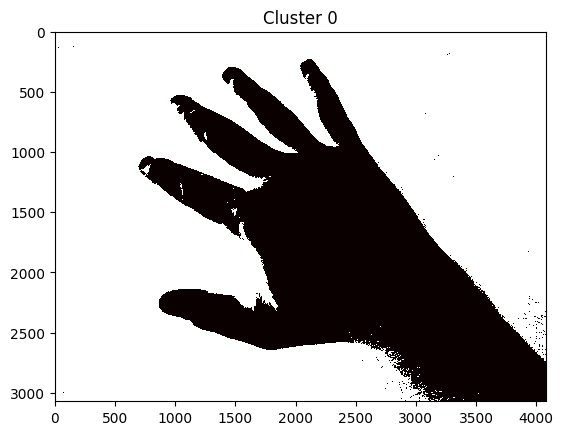

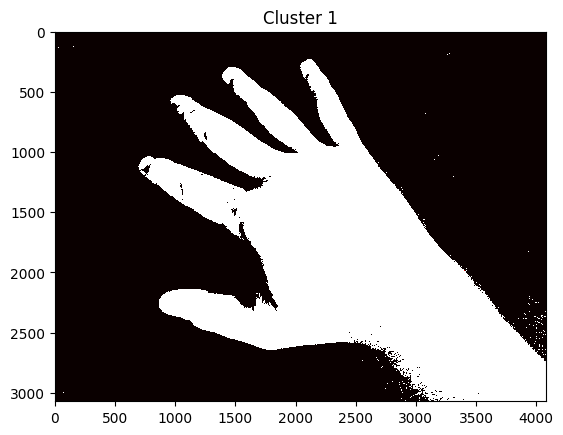

In [10]:
kClusters = [2,3,5]
numExecutions = 100

for clusters in kClusters:
    print(f"Running {clusters} cluster test at {numExecutions} executions.")
    M = buildM(image=image, numExecs=numExecutions, numClusters=clusters)
    X = getPixelProbabilities(M, clusters)
    
    for i in range(0, X.shape[2]):
        plt.title(f"Cluster {i}")
        plt.imshow(X[:, :, i], cmap='hot', interpolation='nearest')
        plt.show()